In [76]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import boxcox, yeojohnson
from sklearn.preprocessing import PolynomialFeatures

In [110]:
data = pd.read_csv('Documents/Datasets/Spotify_Youtube.csv')

In [111]:
data.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [112]:
#отберем нужные переменные
cols = ['Duration_ms', 'Danceability', 'Loudness', 'Speechiness', 'Energy']
df = data[cols].copy()
#преобразуем длительность в секунды
df['Duration'] = df['Duration_ms'] / 1000

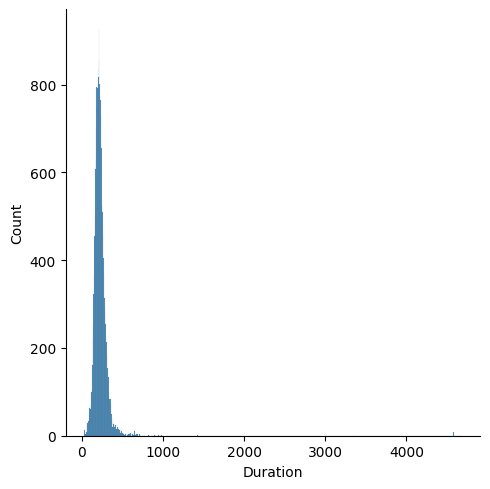

In [5]:
sns.displot(df.Duration)

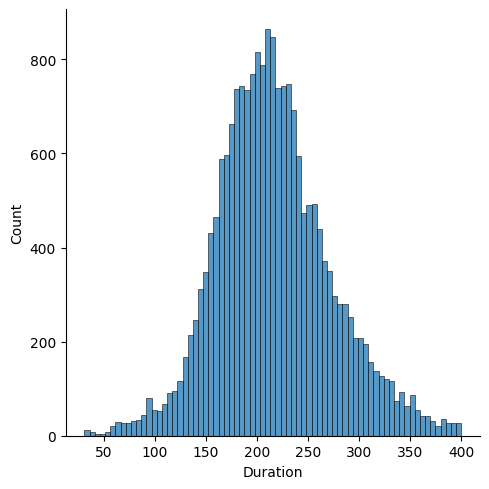

In [6]:
#отсечем все наблюдения, которые больше 400
sns.displot(df[df.Duration < 400].Duration)

In [113]:
#отсечем наблюдения, которые меньше 30, проверим пропуски
df = df[(df.Duration > 30) & (df.Duration < 300)]
df.isna().sum()

Duration_ms     0
Danceability    0
Loudness        0
Speechiness     0
Energy          0
Duration        0
dtype: int64

In [8]:
#описательная статистика
df.describe()

,Duration_ms,Danceability,Loudness,Speechiness,Energy,Duration
count,18646.000000,18646.000000,18646.000000,18646.000000,18646.000000,18646.000000
mean,206110.522150,0.626312,-7.536997,0.097840,0.638738,206.110522
std,45703.952142,0.161589,4.577807,0.113562,0.213155,45.703952
min,30985.000000,0.000000,-46.251000,0.000000,0.000055,30.985000
25%,176144.000000,0.527000,-8.649750,0.035900,0.511000,176.144000
50%,207264.500000,0.643000,-6.422000,0.051300,0.670000,207.264500
75%,237559.000000,0.744000,-4.860000,0.107000,0.801000,237.559000
max,299960.000000,0.975000,0.920000,0.964000,1.000000,299.960000


In [114]:
df = df.drop(columns='Duration_ms')

In [10]:
#импортируем модель
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [115]:
#заводим переменные
x = df.drop(columns=['Duration'])
y = df['Duration']

In [12]:
#указываем интерсепт
x = sm.add_constant(x, prepend=False)

In [13]:
#моделируем
model = OLS(y,x)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     225.9
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          1.01e-189
Time:                        22:04:00   Log-Likelihood:                -97284.
No. Observations:               18646   AIC:                         1.946e+05
Df Residuals:                   18641   BIC:                         1.946e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability   -27.5230      2.208    -12.463   

In [14]:
#исключим незначимый предиктор Energy
x = df.drop(columns=['Duration','Energy'])
y = df['Duration']
x = sm.add_constant(x, prepend=False)

In [15]:
model = OLS(y,x)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     300.2
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          2.43e-190
Time:                        22:04:00   Log-Likelihood:                -97286.
No. Observations:               18646   AIC:                         1.946e+05
Df Residuals:                   18642   BIC:                         1.946e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability   -27.2695      2.204    -12.375   

In [16]:
#видим, что к_детерминации не изменился. Предиктор Energy совсем не объясняет изменчивость наших данных
#протестируем модель без других предикторов
x = df.drop(columns=['Duration', 'Energy','Speechiness'])
y = df['Duration']
x = sm.add_constant(x, prepend=False)

In [17]:
model = OLS(y,x)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     353.8
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          1.48e-151
Time:                        22:04:00   Log-Likelihood:                -97378.
No. Observations:               18646   AIC:                         1.948e+05
Df Residuals:                   18643   BIC:                         1.948e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability   -33.5907      2.165    -15.516   

In [18]:
#коэффициент детерминации снизился

In [19]:
x = df.drop(columns=['Duration', 'Energy','Loudness'])
y = df['Duration']
x = sm.add_constant(x, prepend=False)

In [20]:
model = OLS(y,x)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     134.7
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           8.37e-59
Time:                        22:04:01   Log-Likelihood:                -97592.
No. Observations:               18646   AIC:                         1.952e+05
Df Residuals:                   18643   BIC:                         1.952e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability    -8.1937      2.101     -3.900   

In [21]:
#наблюдаем аналогичное снижение к_детерминации. Стоит остановится на второй модели

In [22]:
#проверяем на мультиколлинеарность
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
X = df[['Danceability', 'Loudness', 'Speechiness']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
  
print(vif_data)

        feature       VIF
0  Danceability  3.283729
1      Loudness  2.593200
2   Speechiness  1.822876


In [24]:
#значительной мультиколлинеарности не обнаружено

# Пробуем предсказывать значения 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [116]:
#подготоваливаем данные
scaler = StandardScaler()

x = df[['Danceability', 'Loudness', 'Speechiness']]
y = df['Duration']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [27]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

In [67]:
print(np.sqrt(mse))

44.9573896009074


In [30]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
model_scaled = LinearRegression()
model_scaled.fit(x_train_scaled, y_train)

LinearRegression()

In [32]:
y_pred = model_scaled.predict(x_test_scaled)

In [33]:
mse = mean_squared_error(y_test, y_pred)

In [34]:
print(np.sqrt(mse))

44.513279689176834


In [35]:
# Ошибка модели составляет +- 44 секунды при средних 200 секундах

<Axes: xlabel='Speechiness', ylabel='Duration'>

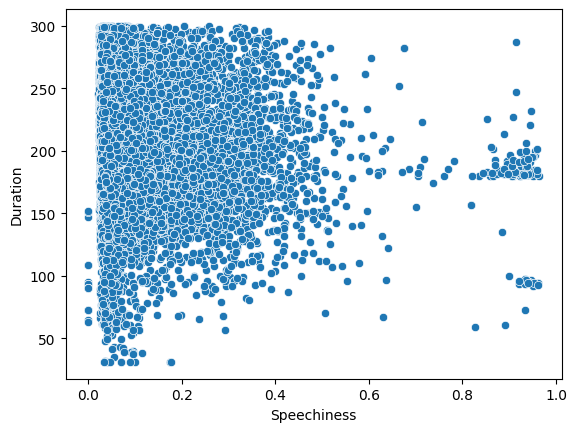

In [39]:
sns.scatterplot(y=df.Duration, x=df.Speechiness)

In [85]:
poly = PolynomialFeatures(degree=5, include_bias=False)
x_poly = poly.fit_transform(x)

# Преобразуем результат обратно в DataFrame для удобства
columns = poly.get_feature_names_out(input_features=x.columns)
x_poly_df = pd.DataFrame(x_poly, columns=columns)

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x_poly_df,y, test_size=0.2, random_state=42)

In [87]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [88]:
y_pred  = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))

43.577566360609886


In [ ]:
# ошибку снизили на 1 секунду :)))

In [96]:
np.log(1.1) * 120

np.float64(11.437221576518992)

In [104]:
def tukey_transform(y):
    if y >= 0:
        return np.sqrt(y + 1)
    elif y == 0:
        return np.log(y)
    else:
        return -np.sqrt(-y + 1)

In [120]:
for col in x.columns:
    if x[col].dtype in [np.float64, np.int64]:
        x[col] = df[col].apply(tukey_transform)

/var/folders/f5/j2ftfrds7x5gpzzqg4x8t7_r0000gn/T/ipykernel_37282/3045242925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = df[col].apply(tukey_transform)


In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=228)

In [125]:
model_tukey = LinearRegression()
model_tukey.fit(x_train,y_train)

LinearRegression()

In [127]:
y_pred = model_tukey.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))

43.85963467544574
